In [2]:
# https://drive.google.com/file/d/1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN/view?usp=sharing
!gdown 1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN

Downloading...
From: https://drive.google.com/uc?id=1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 64.0MB/s]


In [3]:
import pandas as pd

# 1. Load and prepare data
DATASET_PATH = '/content/Twitter_Data.csv'
df = pd.read_csv(DATASET_PATH)
dataset_arr = df.to_numpy()

print(df.tail(5))
print('dataset_arr', dataset_arr[-5:,])
#
print(df.info())


                                               clean_text  category
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0
dataset_arr [['why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers '
  -1.0]
 ['dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist'
  -1.0]
 ['did you cover her interaction forum where she left ' 0.0]
 ['there big project came into india modi dream project but not happened reality'
  0.0]
 ['have you ever listen about like gurukul where

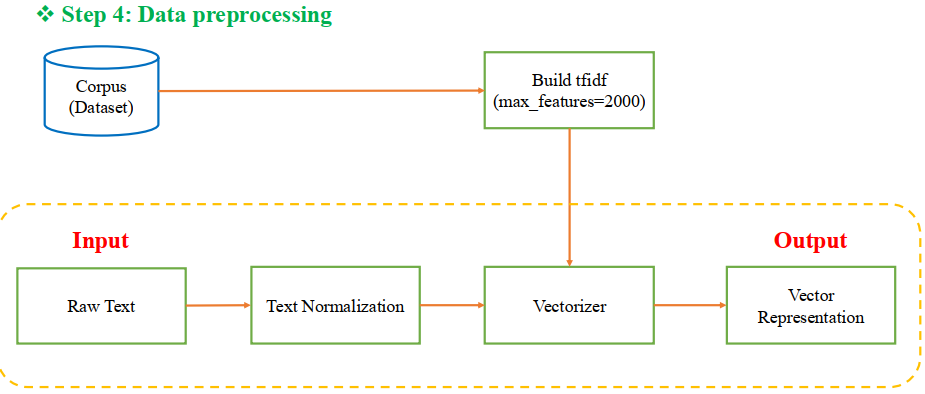

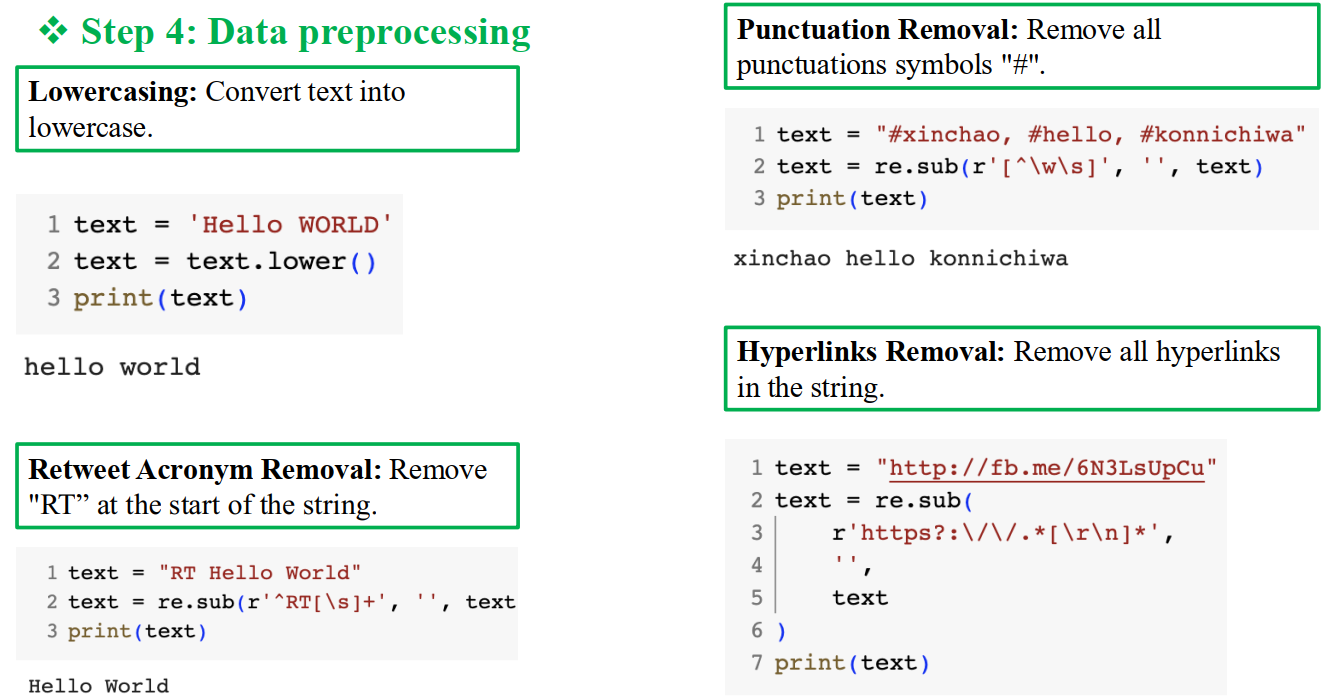

In [4]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Step 1: Load and clean dataset
df = df.dropna()  # X√≥a c√°c h√†ng c√≥ gi√° tr·ªã null

# Step 2: Text normalization
def text_normalize(text: str) -> str:
    """
    Chu·∫©n h√≥a vƒÉn b·∫£n: chuy·ªÉn ch·ªØ th∆∞·ªùng, lo·∫°i b·ªè stop words, k√Ω hi·ªáu, v√† stemming.
    Input:
        text: str - VƒÉn b·∫£n c·∫ßn chu·∫©n h√≥a. V√≠ d·ª•: "I love this movie!"
    Output:
        normalized_text: str - VƒÉn b·∫£n ƒë√£ chu·∫©n h√≥a. V√≠ d·ª•: "love movi"

    Example:
        >>> text = "I love this movie!"
        >>> normalized_text = text_normalize(text)
        >>> print(normalized_text)  # Output: "love movi"
    """
    # Chuy·ªÉn th√†nh ch·ªØ th∆∞·ªùng
    text = text.lower()

    # Lo·∫°i b·ªè k√Ω hi·ªáu v√† t·ª´ vi·∫øt t·∫Øt RT
    text = re.sub(r'^rt[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Lo·∫°i b·ªè stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]  # singing -> sing; shared ->share;...
    normalized_text = ' '.join(words)

    return normalized_text

text_normalize  = text_normalize(""" text = "I love this movie!"
    >>> normalized_text = text_normalize(text)
    >>> print(normalized_text)  # Output: "love movi" """)
text_normalize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'text love movi normalized_text text_normalizetext printnormalized_text output love movi'

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Class Distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64
Epoch 10/100:
Train Loss: 0.6132, Train Acc: 79.02%
Val Loss: 0.6491, Val Acc: 78.31%
Test Loss: 0.6556, Test Acc: 77.62%
--------------------------------------------------
Epoch 20/100:
Train Loss: 0.6127, Train Acc: 78.96%
Val Loss: 0.6512, Val Acc: 78.43%
Test Loss: 0.6552, Test Acc: 77.74%
--------------------------------------------------
Epoch 30/100:
Train Loss: 0.6122, Train Acc: 79.16%
Val Loss: 0.6520, Val Acc: 78.24%
Test Loss: 0.6529, Test Acc: 77.99%
--------------------------------------------------
Epoch 40/100:
Train Loss: 0

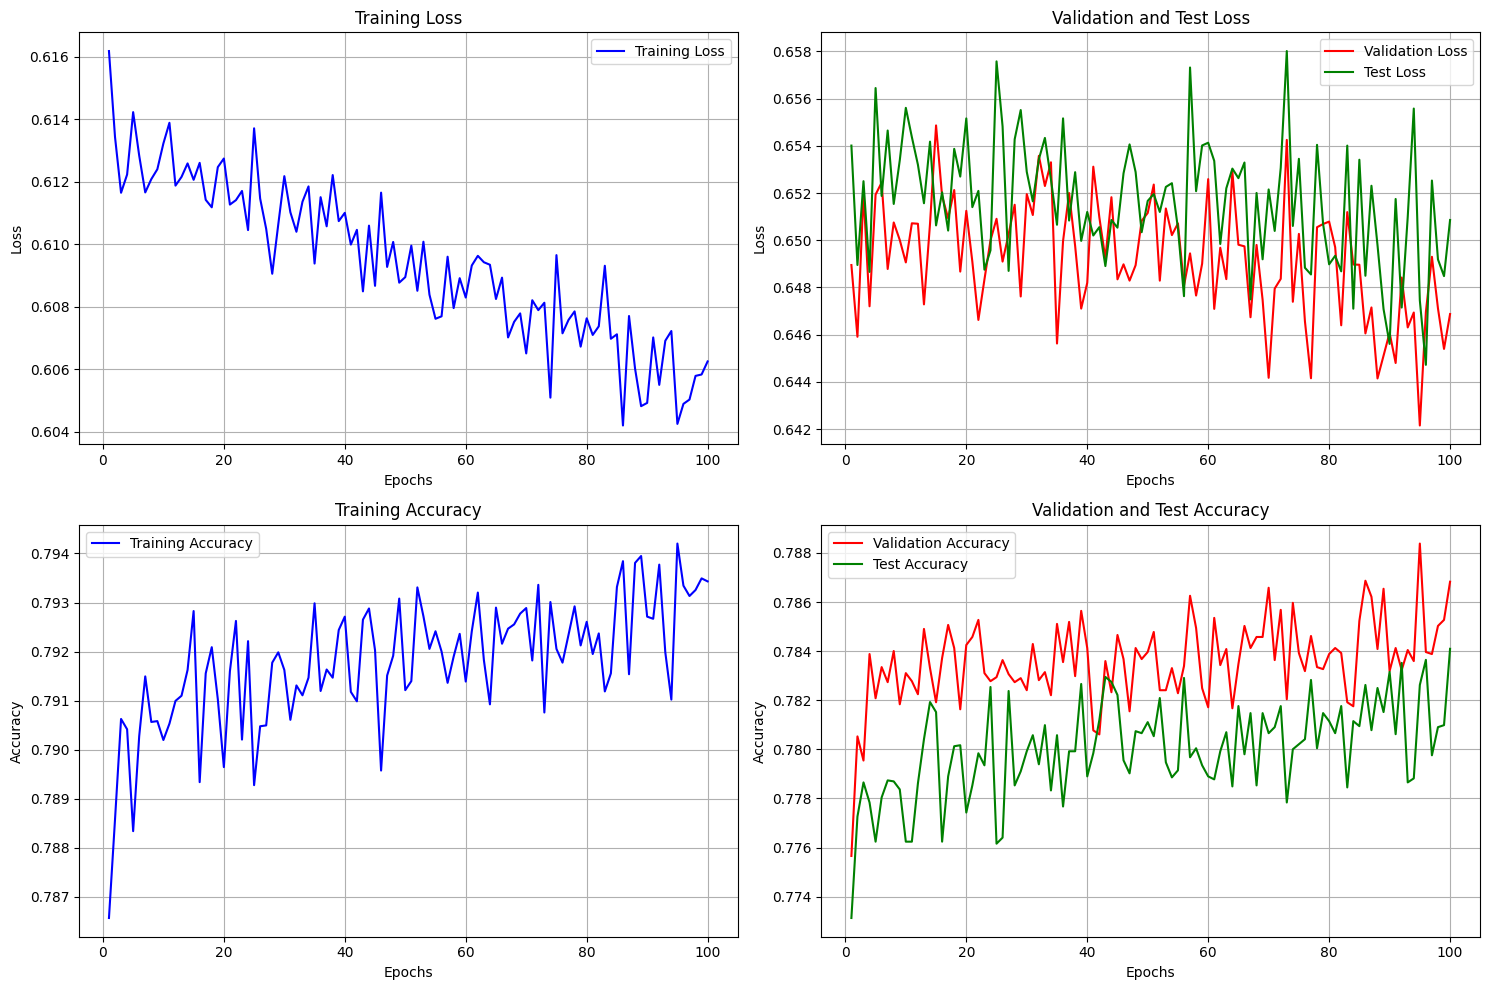

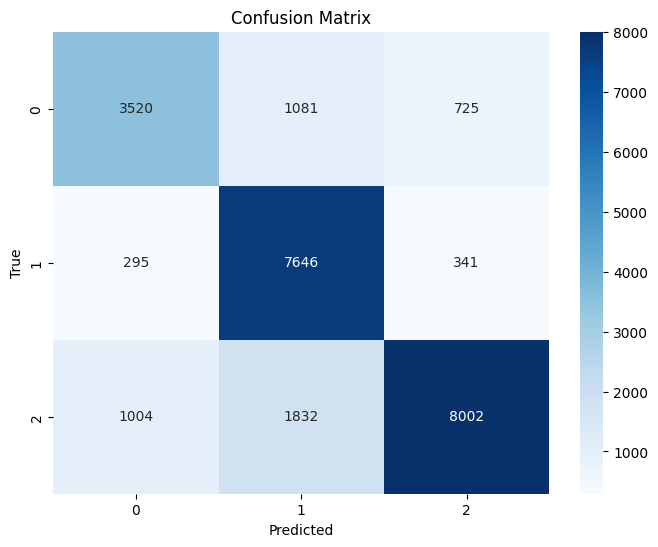


Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.66      0.69      5326
     Neutral       0.72      0.92      0.81      8282
    Positive       0.88      0.74      0.80     10838

    accuracy                           0.78     24446
   macro avg       0.78      0.77      0.77     24446
weighted avg       0.80      0.78      0.78     24446



In [7]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# NLTK for text processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

class SoftmaxRegression:
    """
    Softmax Regression cho ph√¢n t√≠ch sentiment Twitter v·ªõi 3 classes (-1, 0, 1).

    Attributes:
        theta: np.ndarray
            Ma tr·∫≠n tr·ªçng s·ªë c·ªßa model
        n_features: int
            S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o
        n_classes: int
            S·ªë l∆∞·ª£ng classes (3 trong tr∆∞·ªùng h·ª£p n√†y)
        history: Dict
            L·ªãch s·ª≠ training (loss v√† accuracy cho train/val/test)

    Example:
        >>> model = SoftmaxRegression()
        >>> model.fit(X_train, y_train, X_val, y_val)
        >>> y_pred = model.predict(X_test)
    """

    def __init__(self):
        self.theta = None
        self.n_features = None
        self.n_classes = None
        self.history = {
            'train_loss': [], 'val_loss': [], 'test_loss': [],
            'train_acc': [], 'val_acc': [], 'test_acc': []
        }

    def softmax(self, z: np.ndarray) -> np.ndarray:
        """
        T√≠nh softmax v·ªõi numerical stability.

        Input:
            z: np.ndarray - Matrix logits shape (n_samples, n_classes)

        Output:
            np.ndarray - Matrix probabilities shape (n_samples, n_classes)
        """
        shifted_z = z - np.max(z, axis=1, keepdims=True) # shifted_z = (tr·ª´)t·ª´ng ph·∫ßn t·ª≠ trong h√†ng '-' gi√° tr·ªã l·ªõn nh·∫•t trong m·ªói h√†ng c·ªßa ùëß.
        exp_z = np.exp(shifted_z)                        # tr√°nh gi√° tr·ªã qu√° l·ªõn khi t√≠nh l≈©y th·ª´a e^m≈© -> max c·ªßa shifted_z l√† 0, nh∆∞ tr√™n.
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        T√≠nh cross-entropy loss.

        Input:
            X: np.ndarray - Features matrix shape (n_samples, n_features)
            y: np.ndarray - One-hot labels shape (n_samples, n_classes)

        Output:
            float - Gi√° tr·ªã loss trung b√¨nh
        """
        y_pred = self.softmax(np.dot(X, self.theta))
        return -np.mean(np.sum(y * np.log(y_pred + 1e-15), axis=1))

    def compute_accuracy(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        T√≠nh accuracy.

        Input:
            X: np.ndarray - Features matrix
            y: np.ndarray - One-hot labels

        Output:
            float - Accuracy score (0-1)
        """
        y_pred = self.predict(X)
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))

    def fit(self, X_train: np.ndarray, y_train: np.ndarray,
            X_val: np.ndarray, y_val: np.ndarray,
            X_test: np.ndarray = None, y_test: np.ndarray = None,
            learning_rate: float = 0.01,
            epochs: int = 100,
            batch_size: int = 32,
            verbose: bool = True) -> 'SoftmaxRegression':
        """
        Train model v·ªõi mini-batch gradient descent.

        Input:
            X_train, y_train: Training data v√† labels
            X_val, y_val: Validation data v√† labels
            X_test, y_test: Test data v√† labels (optional)
            learning_rate: Learning rate cho gradient descent
            epochs: S·ªë l∆∞·ª£ng epochs
            batch_size: K√≠ch th∆∞·ªõc batch
            verbose: Whether to print progress

        Output:
            self: Trained model instance
        """
        self.n_features = X_train.shape[1]
        self.n_classes = y_train.shape[1]
        self.theta = np.random.randn(self.n_features, self.n_classes) * 0.01

        n_samples = X_train.shape[0]
        n_batches = int(np.ceil(n_samples / batch_size))

        for epoch in range(epochs):
            # Shuffle training data
            indices = np.random.permutation(n_samples)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            # Mini-batch training
            for i in range(n_batches):
                start_idx = i * batch_size
                end_idx = min(start_idx + batch_size, n_samples)

                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]

                # Compute gradients and update weights
                y_pred = self.softmax(np.dot(X_batch, self.theta))
                grad = np.dot(X_batch.T, (y_pred - y_batch)) / len(X_batch)
                self.theta -= learning_rate * grad

            # Compute and store metrics
            metrics = self._compute_epoch_metrics(
                X_train, y_train, X_val, y_val, X_test, y_test)

            for metric_name, value in metrics.items():
                self.history[metric_name].append(value)

            # Print progress
            if verbose and (epoch + 1) % 10 == 0:
                self._print_progress(epoch + 1, epochs, metrics)

        return self

    def _compute_epoch_metrics(self, X_train, y_train, X_val, y_val,
                             X_test=None, y_test=None) -> Dict[str, float]:
        """
        Compute metrics for current epoch.
        """
        metrics = {
            'train_loss': self.compute_loss(X_train, y_train),
            'train_acc': self.compute_accuracy(X_train, y_train),
            'val_loss': self.compute_loss(X_val, y_val),
            'val_acc': self.compute_accuracy(X_val, y_val)
        }

        if X_test is not None and y_test is not None:
            metrics.update({
                'test_loss': self.compute_loss(X_test, y_test),
                'test_acc': self.compute_accuracy(X_test, y_test)
            })

        return metrics

    def _print_progress(self, epoch: int, total_epochs: int, metrics: Dict[str, float]):
        """
        Print training progress.
        """
        print(f'Epoch {epoch}/{total_epochs}:')
        print(f'Train Loss: {metrics["train_loss"]:.4f}, Train Acc: {metrics["train_acc"]:.2%}')
        print(f'Val Loss: {metrics["val_loss"]:.4f}, Val Acc: {metrics["val_acc"]:.2%}')
        if 'test_loss' in metrics:
            print(f'Test Loss: {metrics["test_loss"]:.4f}, Test Acc: {metrics["test_acc"]:.2%}')
        print('-' * 50)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict probabilities for input features.
        """
        return self.softmax(np.dot(X, self.theta))

    def plot_training_history_old(self):
        """
        Plot training history (loss and accuracy curves).
        """
        epochs = range(1, len(self.history['train_loss']) + 1)

        plt.figure(figsize=(15, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        plt.plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        if self.history['test_loss']:
            plt.plot(epochs, self.history['test_loss'], 'g-', label='Test Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history['train_acc'], 'b-', label='Training Accuracy')
        plt.plot(epochs, self.history['val_acc'], 'r-', label='Validation Accuracy')
        if self.history['test_acc']:
            plt.plot(epochs, self.history['test_acc'], 'g-', label='Test Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_training_history(self):
        """
        Plot training history (loss and accuracy curves) using a 2x2 grid.
        """
        epochs = range(1, len(self.history['train_loss']) + 1)

        # Create a 2x2 grid of subplots
        fig, ax = plt.subplots(2, 2, figsize=(15, 10))

        # Plot Training Loss in subplot (0, 0)
        ax[0, 0].plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        ax[0, 0].set_title('Training Loss')
        ax[0, 0].set_xlabel('Epochs')
        ax[0, 0].set_ylabel('Loss')
        ax[0, 0].legend()
        ax[0, 0].grid(True)

        # Plot Validation and Test Loss in subplot (0, 1)
        ax[0, 1].plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        if 'test_loss' in self.history and self.history['test_loss']:
            ax[0, 1].plot(epochs, self.history['test_loss'], 'g-', label='Test Loss')
        ax[0, 1].set_title('Validation and Test Loss')
        ax[0, 1].set_xlabel('Epochs')
        ax[0, 1].set_ylabel('Loss')
        ax[0, 1].legend()
        ax[0, 1].grid(True)

        # Plot Training Accuracy in subplot (1, 0)
        ax[1, 0].plot(epochs, self.history['train_acc'], 'b-', label='Training Accuracy')
        ax[1, 0].set_title('Training Accuracy')
        ax[1, 0].set_xlabel('Epochs')
        ax[1, 0].set_ylabel('Accuracy')
        ax[1, 0].legend()
        ax[1, 0].grid(True)

        # Plot Validation and Test Accuracy in subplot (1, 1)
        ax[1, 1].plot(epochs, self.history['val_acc'], 'r-', label='Validation Accuracy')
        if 'test_acc' in self.history and self.history['test_acc']:
            ax[1, 1].plot(epochs, self.history['test_acc'], 'g-', label='Test Accuracy')
        ax[1, 1].set_title('Validation and Test Accuracy')
        ax[1, 1].set_xlabel('Epochs')
        ax[1, 1].set_ylabel('Accuracy')
        ax[1, 1].legend()
        ax[1, 1].grid(True)

        # Adjust layout
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, X_test: np.ndarray, y_test: np.ndarray):
        """
        Plot confusion matrix for test predictions.
        """
        y_pred = self.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        cm = confusion_matrix(y_true_classes, y_pred_classes)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_true_classes, y_pred_classes,
                                 target_names=['Negative', 'Neutral', 'Positive']))

def prepare_data(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray,
                                            np.ndarray, np.ndarray, np.ndarray]:
    """
    Prepare data for Softmax Regression.
    """
    # Lo·∫°i b·ªè c√°c h√†ng c√≥ gi√° tr·ªã NaN trong c·ªôt 'clean_text' ho·∫∑c 'category'
    df = df.dropna(subset=['clean_text', 'category']).reset_index(drop=True)

    # Create TF-IDF features , TfidfVectorizer c·ªßa scikit-learn ƒë·ªÅu c√≥ th·ªÉ nh·∫≠n gi√° tr·ªã tuy·ªát ƒë·ªëi ho·∫∑c gi√° tr·ªã ph·∫ßn trƒÉm
    vectorizer = TfidfVectorizer(
        max_features=2000,
        min_df=3,     # lo·∫°i b·ªè c√°c t·ª´ xu·∫•t hi·ªán √≠t h∆°n 5 l·∫ßn (gi√° tr·ªã nguy√™n:  min_df v√† max_df s·∫Ω l√† s·ªë l∆∞·ª£ng t√†i li·ªáu t·ªëi thi·ªÉu v√† t·ªëi ƒëa)
        max_df=0.95,  # lo·∫°i b·ªè c√°c t·ª´ xu·∫•t hi·ªán nhi·ªÅu h∆°n 95%(gi√° tr·ªã th·∫≠p ph√¢n (float) trong kho·∫£ng [0.0, 1.0] ->s·∫Ω ƒë∆∞·ª£c hi·ªÉu l√† ph·∫ßn trƒÉm t√†i li·ªáu)
        ngram_range=(1, 2),
        stop_words='english'
    )

    X = vectorizer.fit_transform(df['clean_text']).toarray()

    # Convert labels and create one-hot encoding
    y = df['category'].map({-1.0: 0, 0.0: 1, 1.0: 2}).values
    y = pd.get_dummies(y).values

    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test

if __name__ == "__main__":
    # Load data
    DATASET_PATH = '/content/Twitter_Data.csv'
    df = pd.read_csv(DATASET_PATH)

    # Print dataset info
    print("Dataset Information:")
    print(df.info())
    print("\nClass Distribution:")
    print(df['category'].value_counts())

    # Prepare data
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df)

    # Initialize and train model
    model = SoftmaxRegression()
    model.fit(X_train, y_train, X_val, y_val, X_test, y_test,
             learning_rate=0.01, epochs=100, batch_size=32)

    # Plot training history
    model.plot_training_history()

    # Plot confusion matrix and print classification report
    model.plot_confusion_matrix(X_test, y_test)

In [ ]:
# B∆∞·ªõc x·ª≠ l√Ω: X·ª≠ l√Ω c√°c gi√° tr·ªã √¢m trong c·ªôt 'category' ƒë·ªÉ chuy·ªÉn th√†nh c√°c nh√£n h·ª£p l·ªá cho b√†i to√°n ph√¢n lo·∫°i
# Gi·∫£ s·ª≠ c√°c gi√° tr·ªã l√†: -1.0 cho "ti√™u c·ª±c", 0 cho "trung t√≠nh" v√† 1 cho "t√≠ch c·ª±c"
# Ch√∫ng ta s·∫Ω √°nh x·∫° l·∫°i c√°c gi√° tr·ªã n√†y
df['category'] = df['category'].map({-1.0: 0, 0.0: 1, 1.0: 2})

# Ki·ªÉm tra l·∫°i c·ªôt nh√£n sau khi chuy·ªÉn ƒë·ªïi
print(df['category'].unique())  # N√™n ra c√°c gi√° tr·ªã 0, 1, 2 n·∫øu c√≥ ƒë·ªß c√°c lo·∫°i c·∫£m x√∫c

# Lo·∫°i b·ªè c√°c h√†ng null n·∫øu c√≥ sau khi chuy·ªÉn ƒë·ªïi
df = df.dropna(subset=['clean_text', 'category'])
df

[ 1.  2. nan]


clean_text  category
0       when modi promised ‚Äúminimum government maximum...       1.0
1       talk all the nonsense and continue all the dra...       2.0
5                kiya tho refresh maarkefir comment karo        2.0
6       surat women perform yagna seeks divine grace f...       2.0
7       this comes from cabinet which has scholars lik...       2.0
...                                                   ...       ...
162974  save your agenda peddling ‚Äô had with terror at...       2.0
162975  why these 456 crores paid neerav modi not reco...       1.0
162976  dear rss terrorist payal gawar what about modi...       1.0
162977  did you cover her interaction forum where she ...       2.0
162978  there big project came into india modi dream p...       2.0

[90720 rows x 2 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Kh·ªüi t·∫°o vectorizer v·ªõi s·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa l√† 2000
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['category'].values  # Nh√£n sau khi chuy·ªÉn ƒë·ªïi th√†nh c√°c gi√° tr·ªã 0, 1, 2

X, y

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.25237192, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([1., 2., 2., ..., 1., 2., 2.]))

In [ ]:
import numpy as np

def one_hot_encode_labels(y):
    n_classes = np.max(y) + 1  # 3 l·ªõp: 0, 1, 2
    y_encoded = np.zeros((len(y), n_classes))
    y_encoded[np.arange(len(y)), y] = 1
    return y_encoded

y_encoded = one_hot_encode_labels(y)

TypeError: 'numpy.float64' object cannot be interpreted as an integer